In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "D:\Imarticus\pga18\python"

D:\Imarticus\pga18\python


In [3]:
telecochurn=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
telecochurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecochurn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
telecochurn.shape

(7043, 21)

In [7]:
telecochurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
telecochurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
telecochurn.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [10]:
telecochurn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
### we can observe that 'seniorcitizen' comes under object-datatype and 'Totalcharges' comes under 'float-datatype'
### so,we need to convert them
print(telecochurn.SeniorCitizen.value_counts())
print(telecochurn.TotalCharges.isin([" "]).sum())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
11


In [12]:
### Replacing the senior-citizen column
telecochurn.SeniorCitizen=telecochurn.SeniorCitizen.replace(0,"No")
telecochurn.SeniorCitizen=telecochurn.SeniorCitizen.replace(1,"Yes")
print(telecochurn.SeniorCitizen.tail())
print(telecochurn.SeniorCitizen.value_counts())

7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, dtype: object
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


In [13]:
pd.to_numeric(telecochurn.TotalCharges,errors='coerce').describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [14]:
### Replacing the Total-charges-column with the median-value
telecochurn.TotalCharges=telecochurn.TotalCharges.replace(' ',1397.475)
telecochurn.TotalCharges=pd.to_numeric(telecochurn.TotalCharges)

In [15]:
telecochurn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


<AxesSubplot:ylabel='Frequency'>

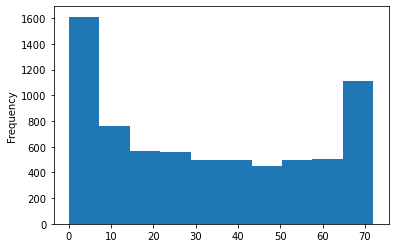

In [16]:
### HISTOGRAM,BOXPLOT AND DENSITY-CURVE FOR 'MONTHLY-CHARGES' AND 'TENURE'
telecochurn.tenure.plot(kind='hist')

<AxesSubplot:>

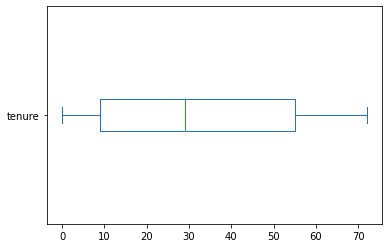

In [17]:
telecochurn.tenure.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

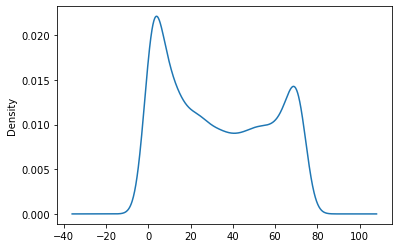

In [18]:
telecochurn.tenure.plot(kind='density')

<AxesSubplot:ylabel='Frequency'>

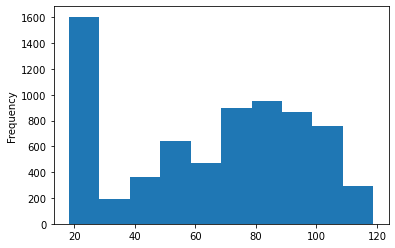

In [19]:
#### plots for Monthly-charges
telecochurn.MonthlyCharges.plot(kind='hist')

<AxesSubplot:>

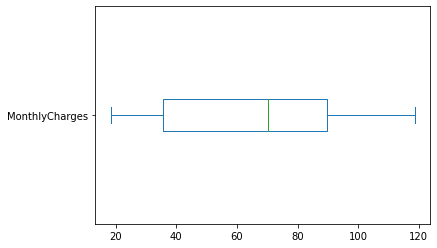

In [20]:
telecochurn.MonthlyCharges.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

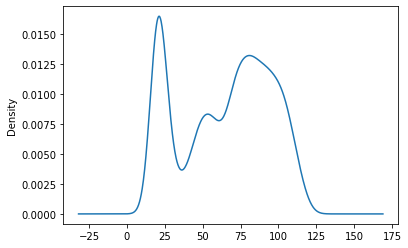

In [21]:
telecochurn.MonthlyCharges.plot(kind='density')

In [22]:
#### Frequency counts for variables--churn,gender,seniorcitizen,paymentmethod
print(telecochurn.Churn.value_counts())
print("------------------------------------")
print(telecochurn.gender.value_counts())
print("------------------------------------")
print(telecochurn.SeniorCitizen.value_counts())
print("------------------------------------")
print(telecochurn.PaymentMethod.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64
------------------------------------
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------------
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
------------------------------------
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [23]:
### CROSS-TABULATION FOR 'CHURN & GENDER','CHURN & INTERNETSERVCS','GENDER & PAYMENT-MTHDS'
print(pd.crosstab(telecochurn.Churn,telecochurn.gender))
print("----------------------------------------------------------------")
print(pd.crosstab(telecochurn.Churn,telecochurn.InternetService))
print("----------------------------------------------------------------")
print(pd.crosstab(telecochurn.gender,telecochurn.PaymentMethod))

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
----------------------------------------------------------------
InternetService   DSL  Fiber optic    No
Churn                                   
No               1962         1799  1413
Yes               459         1297   113
----------------------------------------------------------------
PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
gender                                                              
Female                               788                      752   
Male                                 756                      770   

PaymentMethod  Electronic check  Mailed check  
gender                                         
Female                     1170           778  
Male                       1195           834  


In [24]:
# groupby()#1) Average MonthlyCharges by gender #2) Average tenure by SeniorCitizen #3) Average tenure by PaymentMethod
           #4) Average tenure by InternetService # 5)Average Monthly Charges by StreamingMovies
print("1)Average MonthlyCharges by gender")
print(telecochurn.MonthlyCharges.groupby(telecochurn.gender).mean())
print("----------------------------------------------------------")
print("2)Average tenure by SeniorCitizen")
print(telecochurn.tenure.groupby(telecochurn.SeniorCitizen).mean())
print("----------------------------------------------------------")
print("3)Average tenure by PaymentMethod")
print(telecochurn.tenure.groupby(telecochurn.PaymentMethod).mean())
print("----------------------------------------------------------")
print("4)Average tenure by InternetService")
print(telecochurn.tenure.groupby(telecochurn.InternetService).mean())
print("-----------------------------------------------------------")
print("5)Average Monthly Charges by StreamingMovies")
print(telecochurn.MonthlyCharges.groupby(telecochurn.StreamingMovies).mean())

1)Average MonthlyCharges by gender
gender
Female    65.204243
Male      64.327482
Name: MonthlyCharges, dtype: float64
----------------------------------------------------------
2)Average tenure by SeniorCitizen
SeniorCitizen
No     32.192171
Yes    33.295972
Name: tenure, dtype: float64
----------------------------------------------------------
3)Average tenure by PaymentMethod
PaymentMethod
Bank transfer (automatic)    43.656736
Credit card (automatic)      43.269382
Electronic check             25.174630
Mailed check                 21.830025
Name: tenure, dtype: float64
----------------------------------------------------------
4)Average tenure by InternetService
InternetService
DSL            32.821561
Fiber optic    32.917959
No             30.547182
Name: tenure, dtype: float64
-----------------------------------------------------------
5)Average Monthly Charges by StreamingMovies
StreamingMovies
No                     65.434147
No internet service    21.079194
Yes              

In [25]:
# 1) Test Null Average MonthlyCharges Churn Yes/No Equal
print(telecochurn.MonthlyCharges.groupby(telecochurn.Churn).mean())
print("-----------------------------")
print("variance-checking")
print(telecochurn.MonthlyCharges.groupby(telecochurn.Churn).var())

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64
-----------------------------
variance-checking
Churn
No     966.752767
Yes    608.414183
Name: MonthlyCharges, dtype: float64


In [26]:
### Null=No Significant difference in Average Monthly Charges of Churn yes/no
### Alt= Significant difference in Average Monthly Charges of Churn yes/no
### Importing the 2-sample-independent-t-test,because levels are two
from scipy.stats import ttest_ind

In [27]:
### Splitting the dataframe in to two subsets of churn yes/no
churnyes=telecochurn[telecochurn.Churn=="Yes"]
churnno=telecochurn[telecochurn.Churn=='No']
print(churnyes.shape)
print(churnno.shape)

(1869, 21)
(5174, 21)


In [28]:
## Applying t-test
ttest_ind(churnyes.MonthlyCharges,churnno.MonthlyCharges,equal_var=False)
### p=8.50/(10^73) so p-value < 0.05 => Reject Null

Ttest_indResult(statistic=18.407526676414673, pvalue=8.592449331547539e-73)

In [29]:
### 2)Test Null Average tenure of Churn Yes/No Equal
### Here also we will apply t-test
print(telecochurn.tenure.groupby(telecochurn.Churn).mean())
print('-----------------------------------------')
print("variance-checking")
print(telecochurn.tenure.groupby(telecochurn.Churn).var())

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64
-----------------------------------------
variance-checking
Churn
No     581.474226
Yes    381.464768
Name: tenure, dtype: float64


In [30]:
### Null=No Significant difference in Average tenure of Churn yes/no
### Alt= Significant difference in Average tenure of Churn yes/no
### we already splitted the dataframes.. to churn yes/no
### Applying t-test
ttest_ind(churnyes.tenure,churnno.tenure,equal_var=False)
### p=1.19/(10^232) p<0.05 => Reject null

Ttest_indResult(statistic=-34.82381869631297, pvalue=1.1954945472607148e-232)

In [31]:
### 3)Test Null Average Monthly Charges of different PaymentMethod Equal
### payment mthd is having more than 2-levels so,we need to apply anova test
telecochurn.MonthlyCharges.groupby(telecochurn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    67.192649
Credit card (automatic)      66.512385
Electronic check             76.255814
Mailed check                 43.917060
Name: MonthlyCharges, dtype: float64

In [32]:
### Null= No significant differences in Average Monthly Charges of different payment-methods
### Alt=significant differences in Average Monthly Charges of different payment-methods
### splitting the dataframe in to subsets of diff paymnt-mthds
bt=telecochurn[telecochurn.PaymentMethod=="Bank transfer (automatic)"]
cc=telecochurn[telecochurn.PaymentMethod=="Credit card (automatic)"]
ec=telecochurn[telecochurn.PaymentMethod=="Electronic check"]
mc=telecochurn[telecochurn.PaymentMethod=="Mailed check"]

In [33]:
print(bt.shape)
print(cc.shape)
print(ec.shape)
print(mc.shape)
#### Importing anova f-one way test
from scipy.stats import f_oneway

(1544, 21)
(1522, 21)
(2365, 21)
(1612, 21)


In [34]:
### Applying f-oneway test
f_oneway(bt.MonthlyCharges,cc.MonthlyCharges,ec.MonthlyCharges,mc.MonthlyCharges)
#### p<0.05 => Reject null

F_onewayResult(statistic=450.3189918892516, pvalue=1.1802197193575694e-267)

In [35]:
### 4) Test Null Average tenure of different PaymentMethod Equal
#### Null= No significant differences in Average tenure of different payment-methods
### Alt=significant differences in Average tenure of different payment-methods
telecochurn.tenure.groupby(telecochurn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    43.656736
Credit card (automatic)      43.269382
Electronic check             25.174630
Mailed check                 21.830025
Name: tenure, dtype: float64

In [36]:
### Applying f-oneway test
f_oneway(bt.tenure,cc.tenure,ec.tenure,mc.tenure)
### p<0.05 => Reject null

F_onewayResult(statistic=446.4668862479716, pvalue=1.503848361277172e-265)

In [37]:
### 5) Test Null No Asssociation between gender & Churn
### If two variables are categorical then we will apply chi-square test
pd.crosstab(telecochurn.gender,telecochurn.Churn)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [38]:
### Null= No Association between gender and churn
### Alt= Association between gender and churn
from scipy.stats import chi2_contingency

In [39]:
### Applying chi-sqr-test
chi2_contingency(pd.crosstab(telecochurn.gender,telecochurn.Churn))
### p-value=0.4865 ,p>0.05 => Fail to Reject Null

(0.4840828822091383,
 0.48657873605618596,
 1,
 array([[2562.38989067,  925.61010933],
        [2611.61010933,  943.38989067]]))

In [40]:
### 6) Test Null No Association between SeniorCitizen & Churn
pd.crosstab(telecochurn.SeniorCitizen,telecochurn.Churn)

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


In [41]:
### Null= No Association between SeniorCitizen & Churn
### Alt= Association between SeniorCitizen & Churn
### Applying chi2-test
chi2_contingency(pd.crosstab(telecochurn.SeniorCitizen,telecochurn.Churn))
### p-value=1.15/(10^36)  p<0.05 => Reject Null

(159.42630036838742,
 1.510066805092378e-36,
 1,
 array([[4335.05239245, 1565.94760755],
        [ 838.94760755,  303.05239245]]))

In [42]:
#### Splitting in to numeric and object columns
telecochurn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [43]:
numericcols=telecochurn.select_dtypes(include=np.number)
objcols=telecochurn.select_dtypes(include=['object'])
print(numericcols.columns)
print(objcols.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [44]:
objcols=objcols.drop('customerID',axis=1)
print(objcols.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
objcols_dummy=objcols.apply(le.fit_transform)

In [48]:
type(objcols_dummy)

pandas.core.frame.DataFrame

In [49]:
combineddf=pd.concat([numericcols,objcols_dummy],axis=1)
print(combineddf.shape)

(7043, 20)


In [50]:
combineddf.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2,53.85,108.15,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [51]:
combineddf.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [52]:
combineddf.dtypes

tenure                int64
MonthlyCharges      float64
TotalCharges        float64
gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
Churn                 int32
dtype: object

In [53]:
y=combineddf.Churn
X=combineddf.drop(['gender','Churn'],axis=1) ### gender is dropped based on the hypothesis-test

<AxesSubplot:ylabel='Churn'>

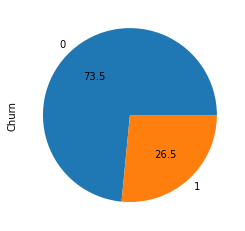

In [54]:
### Checking for data imbalance
y.astype(object).value_counts().plot(kind='pie',autopct='%1.1f')
## It is imbalanced-data

In [55]:
### Logistic regression :
from sklearn.linear_model import LogisticRegression

In [56]:
logreg=LogisticRegression(max_iter=2000)

In [57]:
logreg_model=logreg.fit(X,y)

In [58]:
logreg_model.score(X,y)

0.80335084481045

In [59]:
logreg_predct=logreg_model.predict(X)

In [60]:
pd.crosstab(y,logreg_predct)

col_0,0,1
Churn,,
0,4599,575
1,810,1059


In [61]:
from sklearn.metrics import classification_report

In [62]:
from sklearn.metrics import plot_roc_curve

In [63]:
print(classification_report(y,logreg_predct))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5174
           1       0.65      0.57      0.60      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.73      0.74      7043
weighted avg       0.80      0.80      0.80      7043



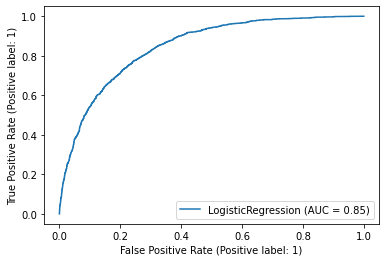

In [64]:
plot_roc_curve(logreg_model,X,y)

In [65]:
##### Decision-tree
from sklearn.tree import DecisionTreeClassifier

In [66]:
tree=DecisionTreeClassifier(max_depth=13,criterion='entropy')

In [67]:
tree_model=tree.fit(X,y)

In [68]:
tree_model.score(X,y)

0.8967769416441858

In [69]:
tree_pred=tree.predict(X)

In [70]:
pd.crosstab(y,tree_pred)

col_0,0,1
Churn,,
0,4915,259
1,468,1401


In [71]:
print(classification_report(y,tree_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5174
           1       0.84      0.75      0.79      1869

    accuracy                           0.90      7043
   macro avg       0.88      0.85      0.86      7043
weighted avg       0.89      0.90      0.89      7043



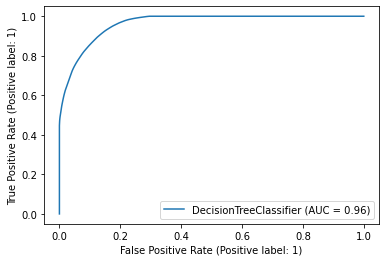

In [72]:
plot_roc_curve(tree_model,X,y)

In [73]:
#### Random-forest
from sklearn.ensemble import RandomForestClassifier

In [74]:
RF=RandomForestClassifier(n_estimators=900,oob_score=True)

In [75]:
rfmodel=RF.fit(X,y)

In [76]:
rfmodel.score(X,y)

0.9970183160584978

In [77]:
rf_pred=rfmodel.predict(X)

In [78]:
pd.crosstab(y,rf_pred)

col_0,0,1
Churn,,
0,5166,8
1,13,1856


In [79]:
print(classification_report(y,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5174
           1       1.00      0.99      0.99      1869

    accuracy                           1.00      7043
   macro avg       1.00      1.00      1.00      7043
weighted avg       1.00      1.00      1.00      7043



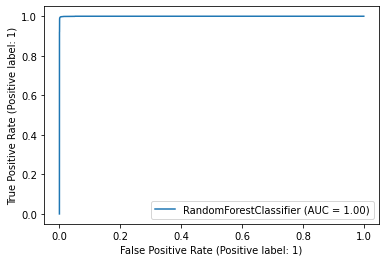

In [80]:
plot_roc_curve(rfmodel,X,y)

In [81]:
### Gradient-boosting
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb=GradientBoostingClassifier(n_estimators=2000)

In [83]:
gbmodel=gb.fit(X,y)

In [84]:
gbmodel.score(X,y)

0.9564106204742298

In [85]:
gb_pred=gbmodel.predict(X)

In [86]:
pd.crosstab(y,gb_pred)

col_0,0,1
Churn,,
0,5084,90
1,217,1652


In [87]:
print(classification_report(y,gb_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5174
           1       0.95      0.88      0.91      1869

    accuracy                           0.96      7043
   macro avg       0.95      0.93      0.94      7043
weighted avg       0.96      0.96      0.96      7043



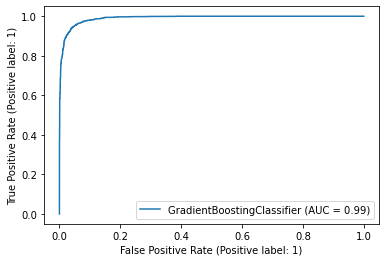

In [88]:
plot_roc_curve(gbmodel,X,y)

In [89]:
### Navie-bayes
from sklearn.naive_bayes import GaussianNB

In [90]:
nb=GaussianNB()

In [91]:
nbmodel=nb.fit(X,y)

In [92]:
nbmodel.score(X,y)

0.7530881726536988

In [93]:
nd_pred=nbmodel.predict(X)

In [94]:
pd.crosstab(y,nd_pred)

col_0,0,1
Churn,,
0,3923,1251
1,488,1381


In [95]:
print(classification_report(y,nd_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      5174
           1       0.52      0.74      0.61      1869

    accuracy                           0.75      7043
   macro avg       0.71      0.75      0.72      7043
weighted avg       0.79      0.75      0.76      7043



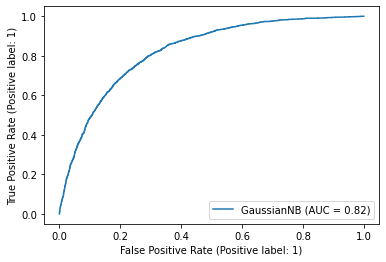

In [96]:
plot_roc_curve(nbmodel,X,y)